## Linear Regression:
*Linear Regression* is a statistical tool which shows the linear relationship between one or more independent variables with respect to a dependent continuous variable. In machine learning world linear regression is an algorithm used to build a model which predicts the value of a continuous response variable with the values of predictor variables variables.

The *formula* for linear regression is given by $y=b0+b1*x1+b2*x2+b3+x3+.....+bn*xn

    b0->intercept.
    b1,b2,b3,..,bn->coefficients of x1,x2,x3....xn respectively.
    x1,x2,x3,...,xn->independent variables.
    
To know more about [linear regression]:(https://www.geeksforgeeks.org/ml-linear-regression/)

### Univariate linear regression:

Regression applied when there is one independent variable explained by one dependent variable 

In [3]:
## importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

C:\Users\ronal\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ronal\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ronal\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
df=pd.read_csv(r'D:\BDA 2020 assignments\py-master\ML\1_linear_reg\Exercise\canada_per_capita_income.csv')

In [5]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'income')

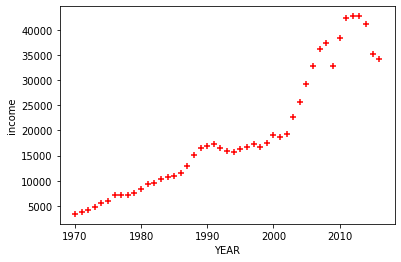

In [16]:
##visualising the linear relationship between independent and dependent variable 

plt.scatter(df.year,df['per capita income (US$)'],marker='+',color='red')
plt.xlabel('YEAR')
plt.ylabel('income')


In [31]:
#creating a regression object and a model
lm=linear_model.LinearRegression()
lm.fit(df[['year']],df['per capita income (US$)'])

LinearRegression()

In [29]:
lm.predict([[2020]])

array([41288.69409442])

In [32]:
lm.coef_

array([828.46507522])

In [33]:
lm.intercept_

-1632210.7578554575

In [1]:
#verifying the result

828.46507522*2020+-1632210.7578554575

41288.694088942604

In [39]:
df.shape

(47, 2)

In [43]:
df['sample_year']=np.random.randint(1967,2020,47)
df.head()

,year,per capita income (US$),sample_year
0,1970,3399.299037,1981
1,1971,3768.297935,1971
2,1972,4251.175484,1979
3,1973,4804.463248,1972
4,1974,5576.514583,2009


In [59]:
import os

os.chdir(r'D:\BDA 2020 assignments\py-master\ML\1_linear_reg\Exercise')
os.getcwd()

'D:\\BDA 2020 assignments\\py-master\\ML\\1_linear_reg\\Exercise'

In [61]:
df['predicted_incomes']=lm.predict(df[['sample_year']])
df.head()
df.to_csv('done_exercise1.csv')


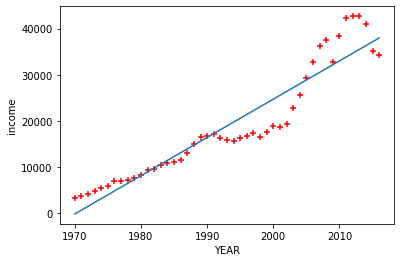

In [64]:
plt.scatter(df.year,df['per capita income (US$)'],marker='+',color='red')
plt.xlabel('YEAR')
plt.ylabel('income')
plt.plot(df['year'],lm.predict(df[['year']]))

## Multivariate regression:

Regression applied when we have multpile independent variable explaining a single continuous variable

In [158]:
hiring=pd.read_csv(r'D:\BDA 2020 assignments\py-master\ML\2_linear_reg_multivariate\Exercise\hiring.csv')

In [159]:
hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [160]:
hiring.shape

(8, 4)

In [161]:
#to convert the experience(ordinal category) into numeric value

from word2number import w2n



In [162]:
hiring['experience']=hiring['experience'].astype(pd.StringDtype())
hiring.dtypes

experience                     string
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [163]:
hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,<NA>,8.0,9,50000
1,<NA>,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [164]:
hiring.fillna('zero',inplace=True)

In [165]:

hiring['experience']=[w2n.word_to_num(x) for x in hiring['experience']]


In [166]:
hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8,9,50000
1,0,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000


In [175]:
hiring['test_score(out of 10)']=hiring['test_score(out of 10)'].replace(0,hiring['test_score(out of 10)'].median())
hiring['test_score(out of 10)']


0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     7.5
7     7.0
Name: test_score(out of 10), dtype: float64

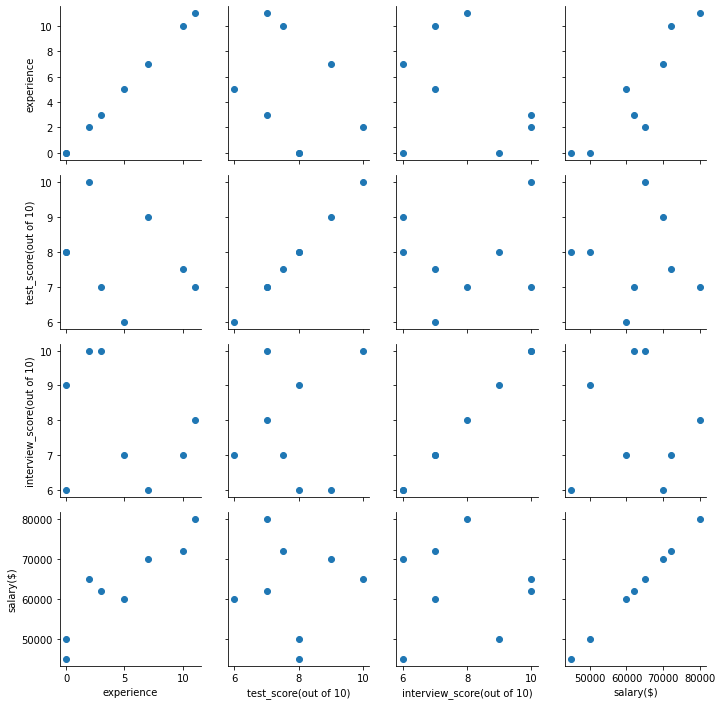

In [181]:
# visualise the linear relationships between each feature in the data
import seaborn as sbn
x=sbn.PairGrid(hiring)
x.map(plt.scatter)


In [185]:
#building a regression model usinf skleran
reg=linear_model.LinearRegression()
reg.fit(hiring[['experience','test_score(out of 10)','interview_score(out of 10)']],hiring['salary($)'])

LinearRegression()

In [187]:
reg.predict([[2,9,6]])

array([53488.63127264])

In [189]:
reg.coef_

array([2866.30171822, 2063.95842489, 2175.99447031])

In [190]:
reg.intercept_

16124.435190360557

In [191]:
##checking if the result we obtained from the model tallies

2*2866.30171822+2063.95842489*9+2175.99447031*6+16124.435190360557

53488.63127267056

In [194]:
os.getcwd()
os.chdir(r'D:\BDA 2020 assignments\py-master\ML\2_linear_reg_multivariate\Exercise')